In [49]:
import numpy as np
from time_integrators import RK2, RK4, theta_scheme
from scipy.optimize import root
import pylab as pl
%matplotlib inline

pl.style.use('latexplot')

In [50]:
# Defining the x-domain:
x_start = 0
x_end   = 40
N_x     = 401
dx      = (x_end - x_start) / N_x

# Number of ghost cells:
N_g     = 1
x       = x_start + (0.5 + np.arange(-N_g, N_x + N_g)) * dx

In [51]:
# Defining the time array:
t_final = 40
N_t     = 40001
t       = np.linspace(0, t_final, N_t)
dt      = t[1] - t[0]

In [91]:
# Defining the dimensionless concentration of species A:
a0 = x**0

# The applied potential is going to be varied as E(t) = E_start + t
# Below, we are defining E_start (starting potential) (dicated by experimenter):
E_start = -10
# Formal potential (dictated by chemical)
E0 = -1
# Rate constant of the reaction:
k0 = 35
# Charge transfer coefficient:
alpha = 0.5

# Time period for cyclic voltametry:
t_rev = 20

# Parameters for AC
delta_E = 0.1
omega   = 4 * np.pi

In [92]:
# Applied potential for linear voltametry:
def E_linear(t):
    return(E_start + t)
# Applied potential for cyclic voltametry:
def E_cyclic(t):
    if((t % (2 * t_rev)) <= t_rev):
        return(E_start + t)
    else:
        return(E_start + 2 * t_rev - (t % (2 * t_rev)))
def E_sine(t):
    return(E_linear(t) + delta_E * np.sin(omega * t))

In [93]:
# Forcing function:
def F(a, t):
    return(k0 * (a * np.exp((1 - alpha) * (E_sine(t) - E0)) - (1-a) * np.exp(-alpha * (E_sine(t) - E0))))

In [94]:
def apply_bcs(a, t):
    # Applying the boundary conditions:
    a[0] = root(lambda x: a[1] - x - F(0.5 * (a[1] + x), t) * dx, a[1]).x
    # Boundary condition at x = infty
    a[-N_g:] = 1
    return(a)

In [95]:
def da_dt(a, t):
    # Applying the boundary conditions:
    a = apply_bcs(a, t)
    # Evaluating the 2nd derivative using central differences:
    d2a_dx2 = (np.roll(a, -1) + np.roll(a, 1) - 2 * a) / dx**2
    return d2a_dx2

In [96]:
# Evaluating the current:
I2 = np.zeros(t.size)
# Initial value of a:
a = a0
for i in range(t.size - 1):
    a = RK4(da_dt, a, t[i], t[i + 1])
    a = apply_bcs(a, t[i+1])
    I2[i] = (a[1] - a[0]) / dx

In [97]:
I_integral  = np.loadtxt('I_integral3.txt')
I_integral2 = np.loadtxt('I_integral2.txt')
I_integral3 = np.loadtxt('I_integral4.txt')
t_integral  = np.arange(0, 40, 0.01)

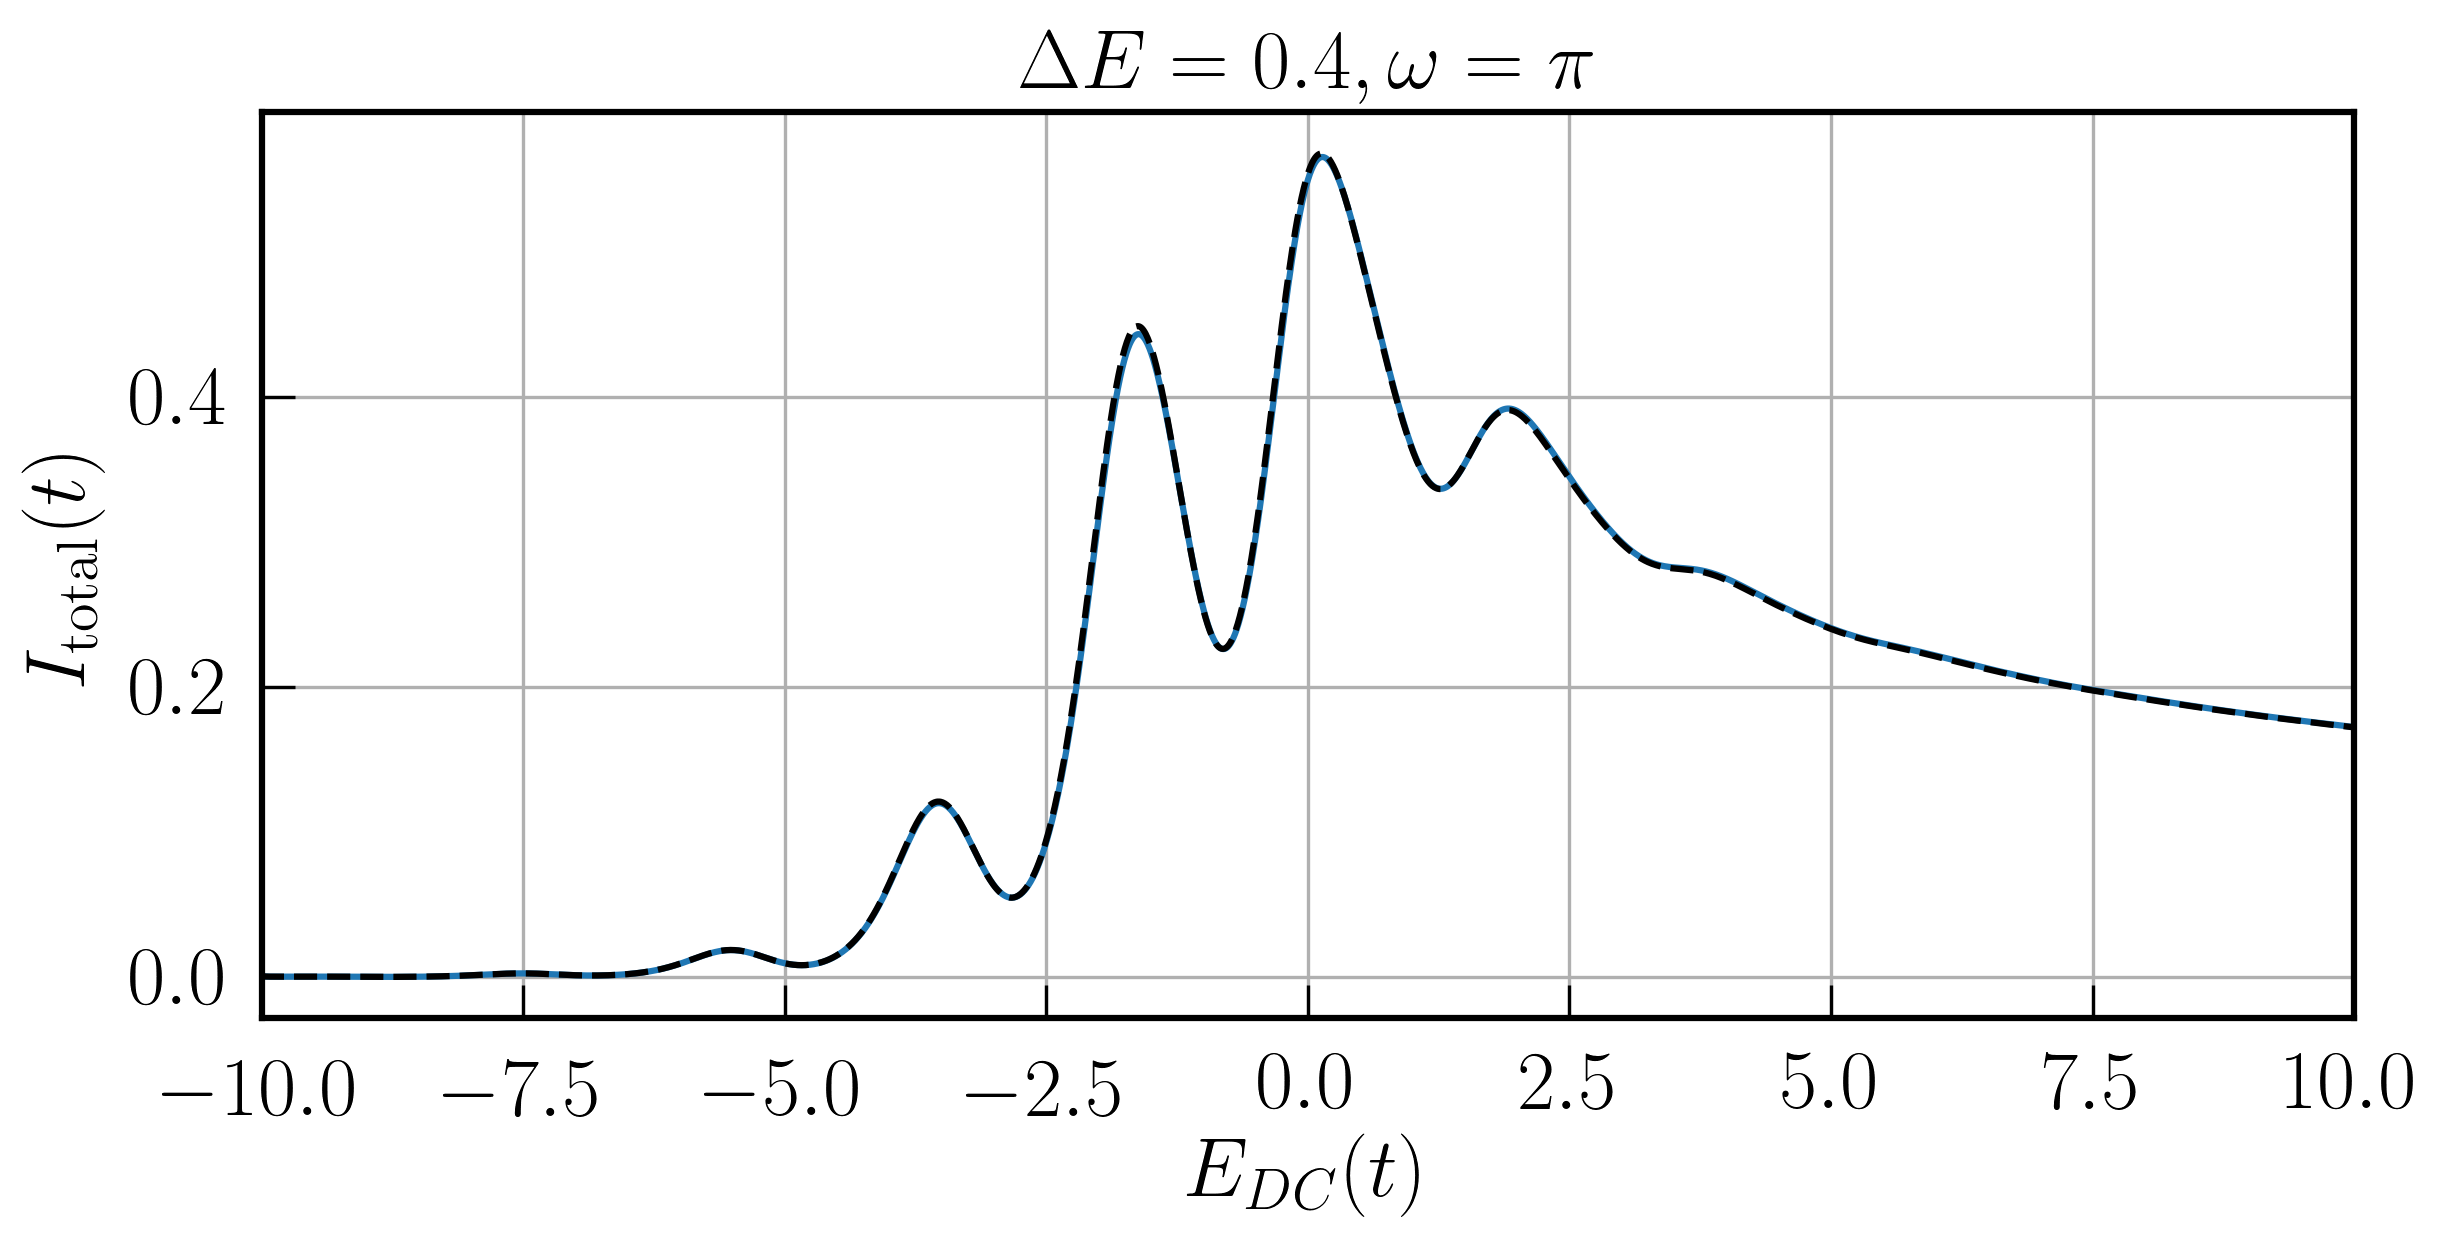

In [116]:
pl.plot(E_linear(t), I, label = r'$k_0 = 35$')
pl.plot(E_linear(t_integral), I_integral, 'k--', label = r'$k_0 = 35$')
pl.xlabel(r'$E_{DC}(t)$')
pl.ylabel(r'$I_{\mathrm{total}}(t)$')
pl.title(r'$\Delta E = 0.4, \omega = \pi$')
pl.xlim(-10, 10)
pl.grid()
pl.savefig('plot1.png', bbox_inches = 'tight')

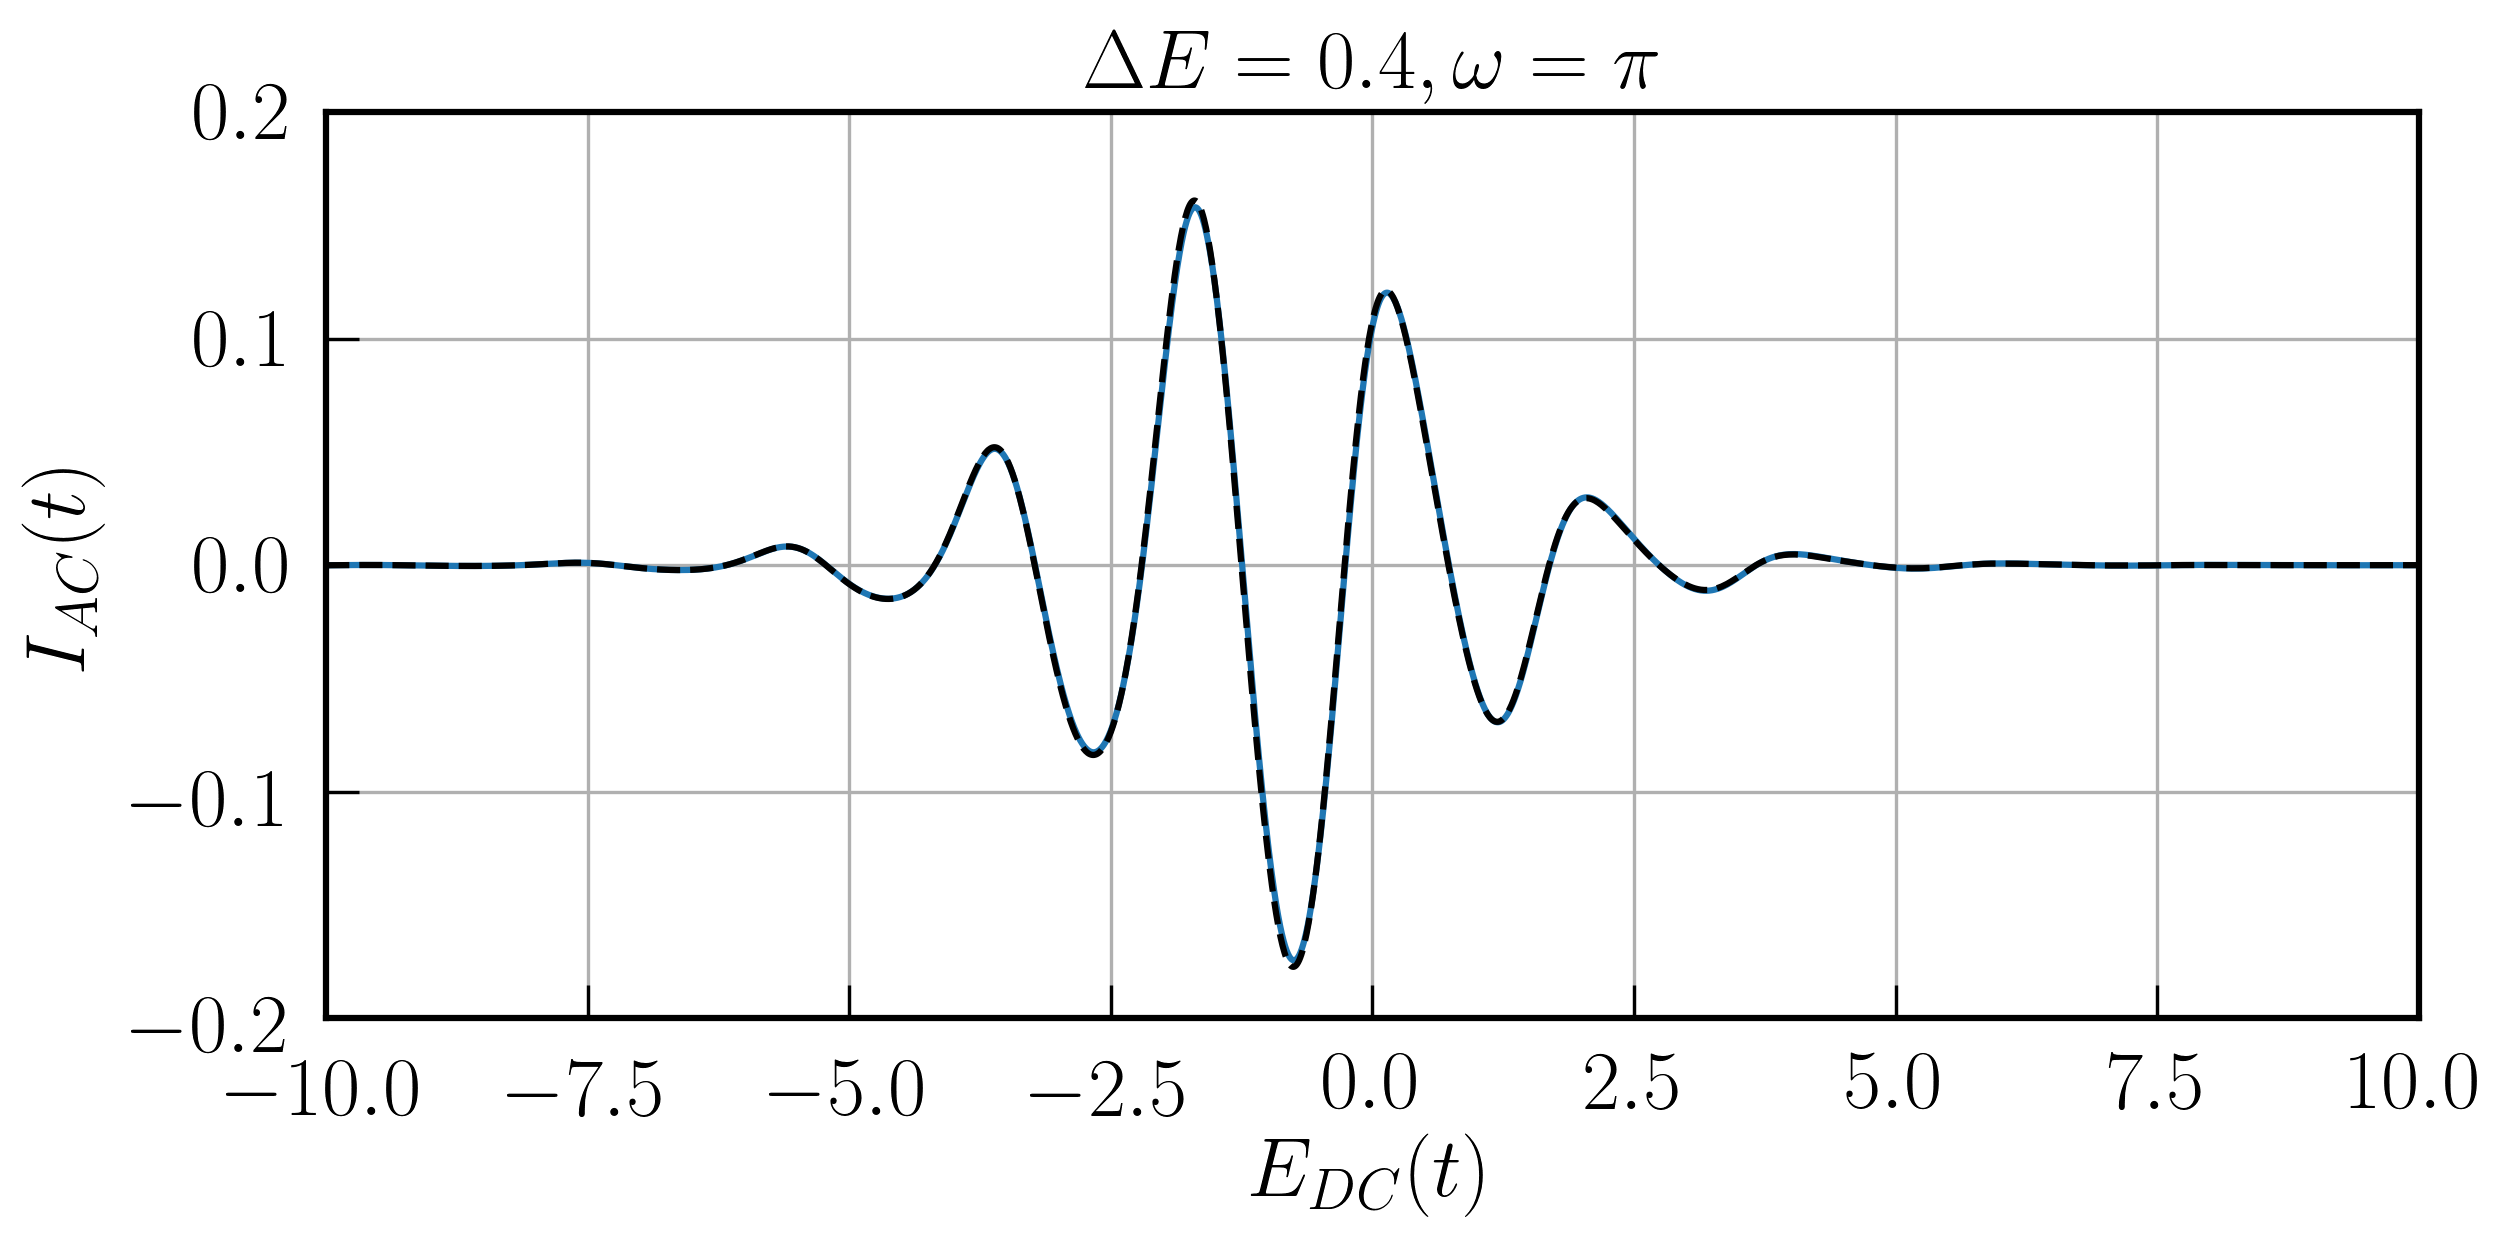

In [117]:
pl.plot(E_linear(t), I - Idc, label = r'$k_0 = 35$')
pl.plot(E_linear(t_integral), I_integral - I_integral2, 'k--', label = r'$k_0 = 35$')
pl.xlim(-10, 10)
pl.ylim(-0.2, 0.2)
pl.xlabel(r'$E_{DC}(t)$')
pl.ylabel(r'$I_{AC}(t)$')
pl.title(r'$\Delta E = 0.4, \omega = \pi$')
pl.grid()
pl.savefig('plot2.png', bbox_inches = 'tight')

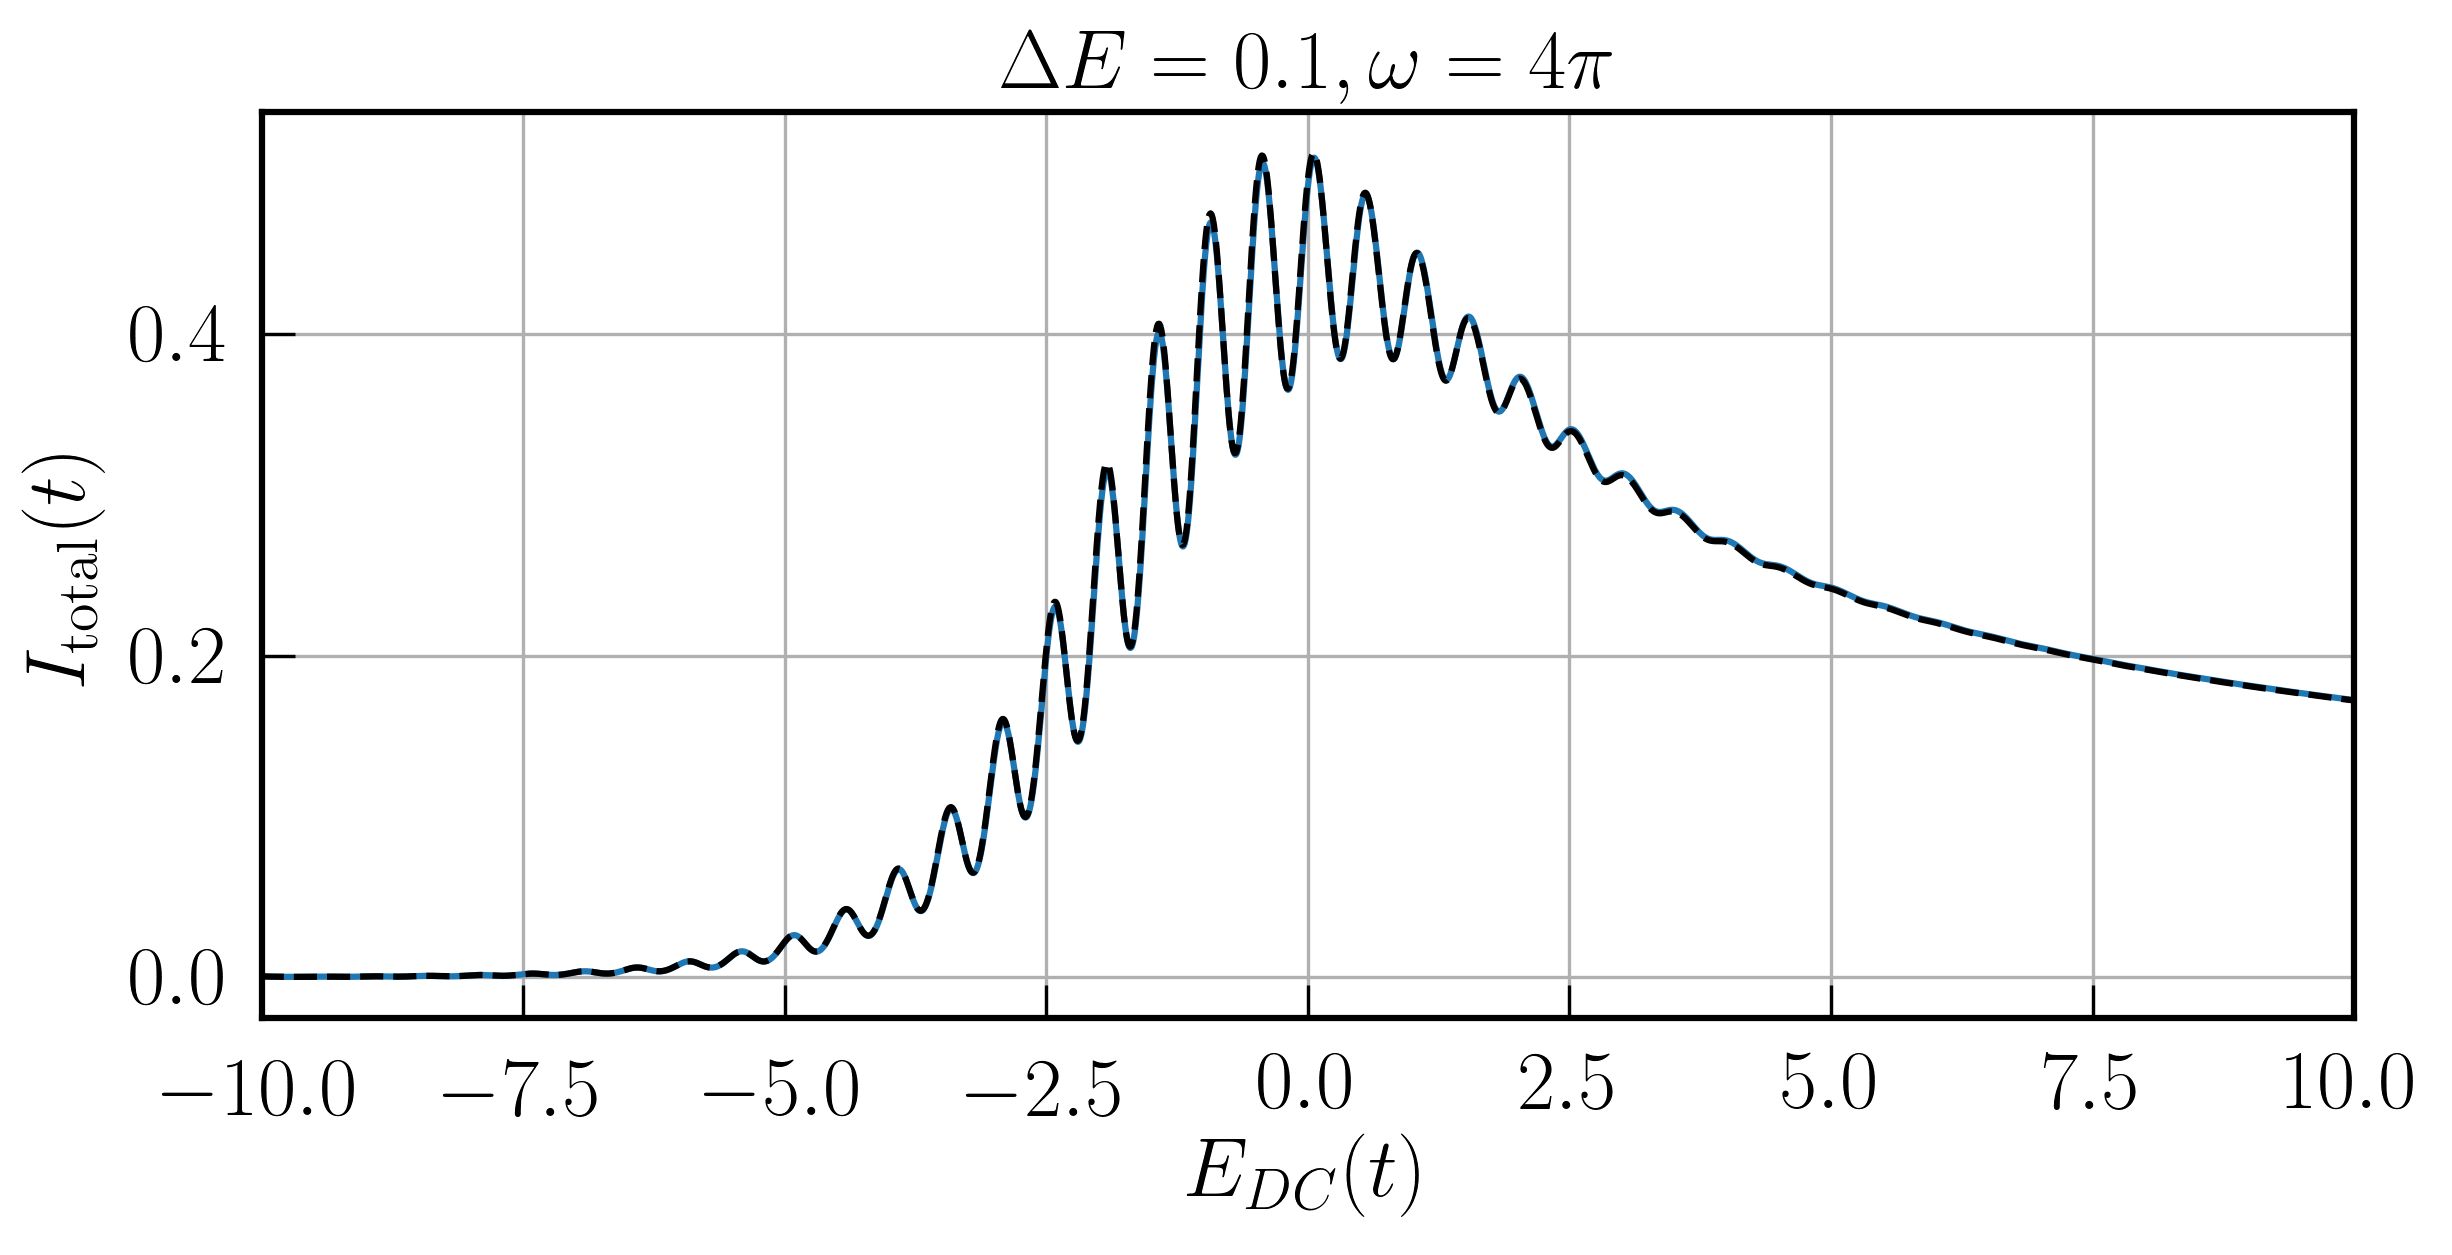

In [118]:
pl.plot(E_linear(t), I2, label = r'$k_0 = 35$')
pl.plot(E_linear(t_integral), I_integral3, 'k--', label = r'$k_0 = 35$')
pl.xlim(-10, 10)
pl.xlabel(r'$E_{DC}(t)$')
pl.ylabel(r'$I_{\mathrm{total}}(t)$')
pl.title(r'$\Delta E = 0.1, \omega = 4\pi$')
pl.grid()
pl.savefig('plot3.png', bbox_inches = 'tight')

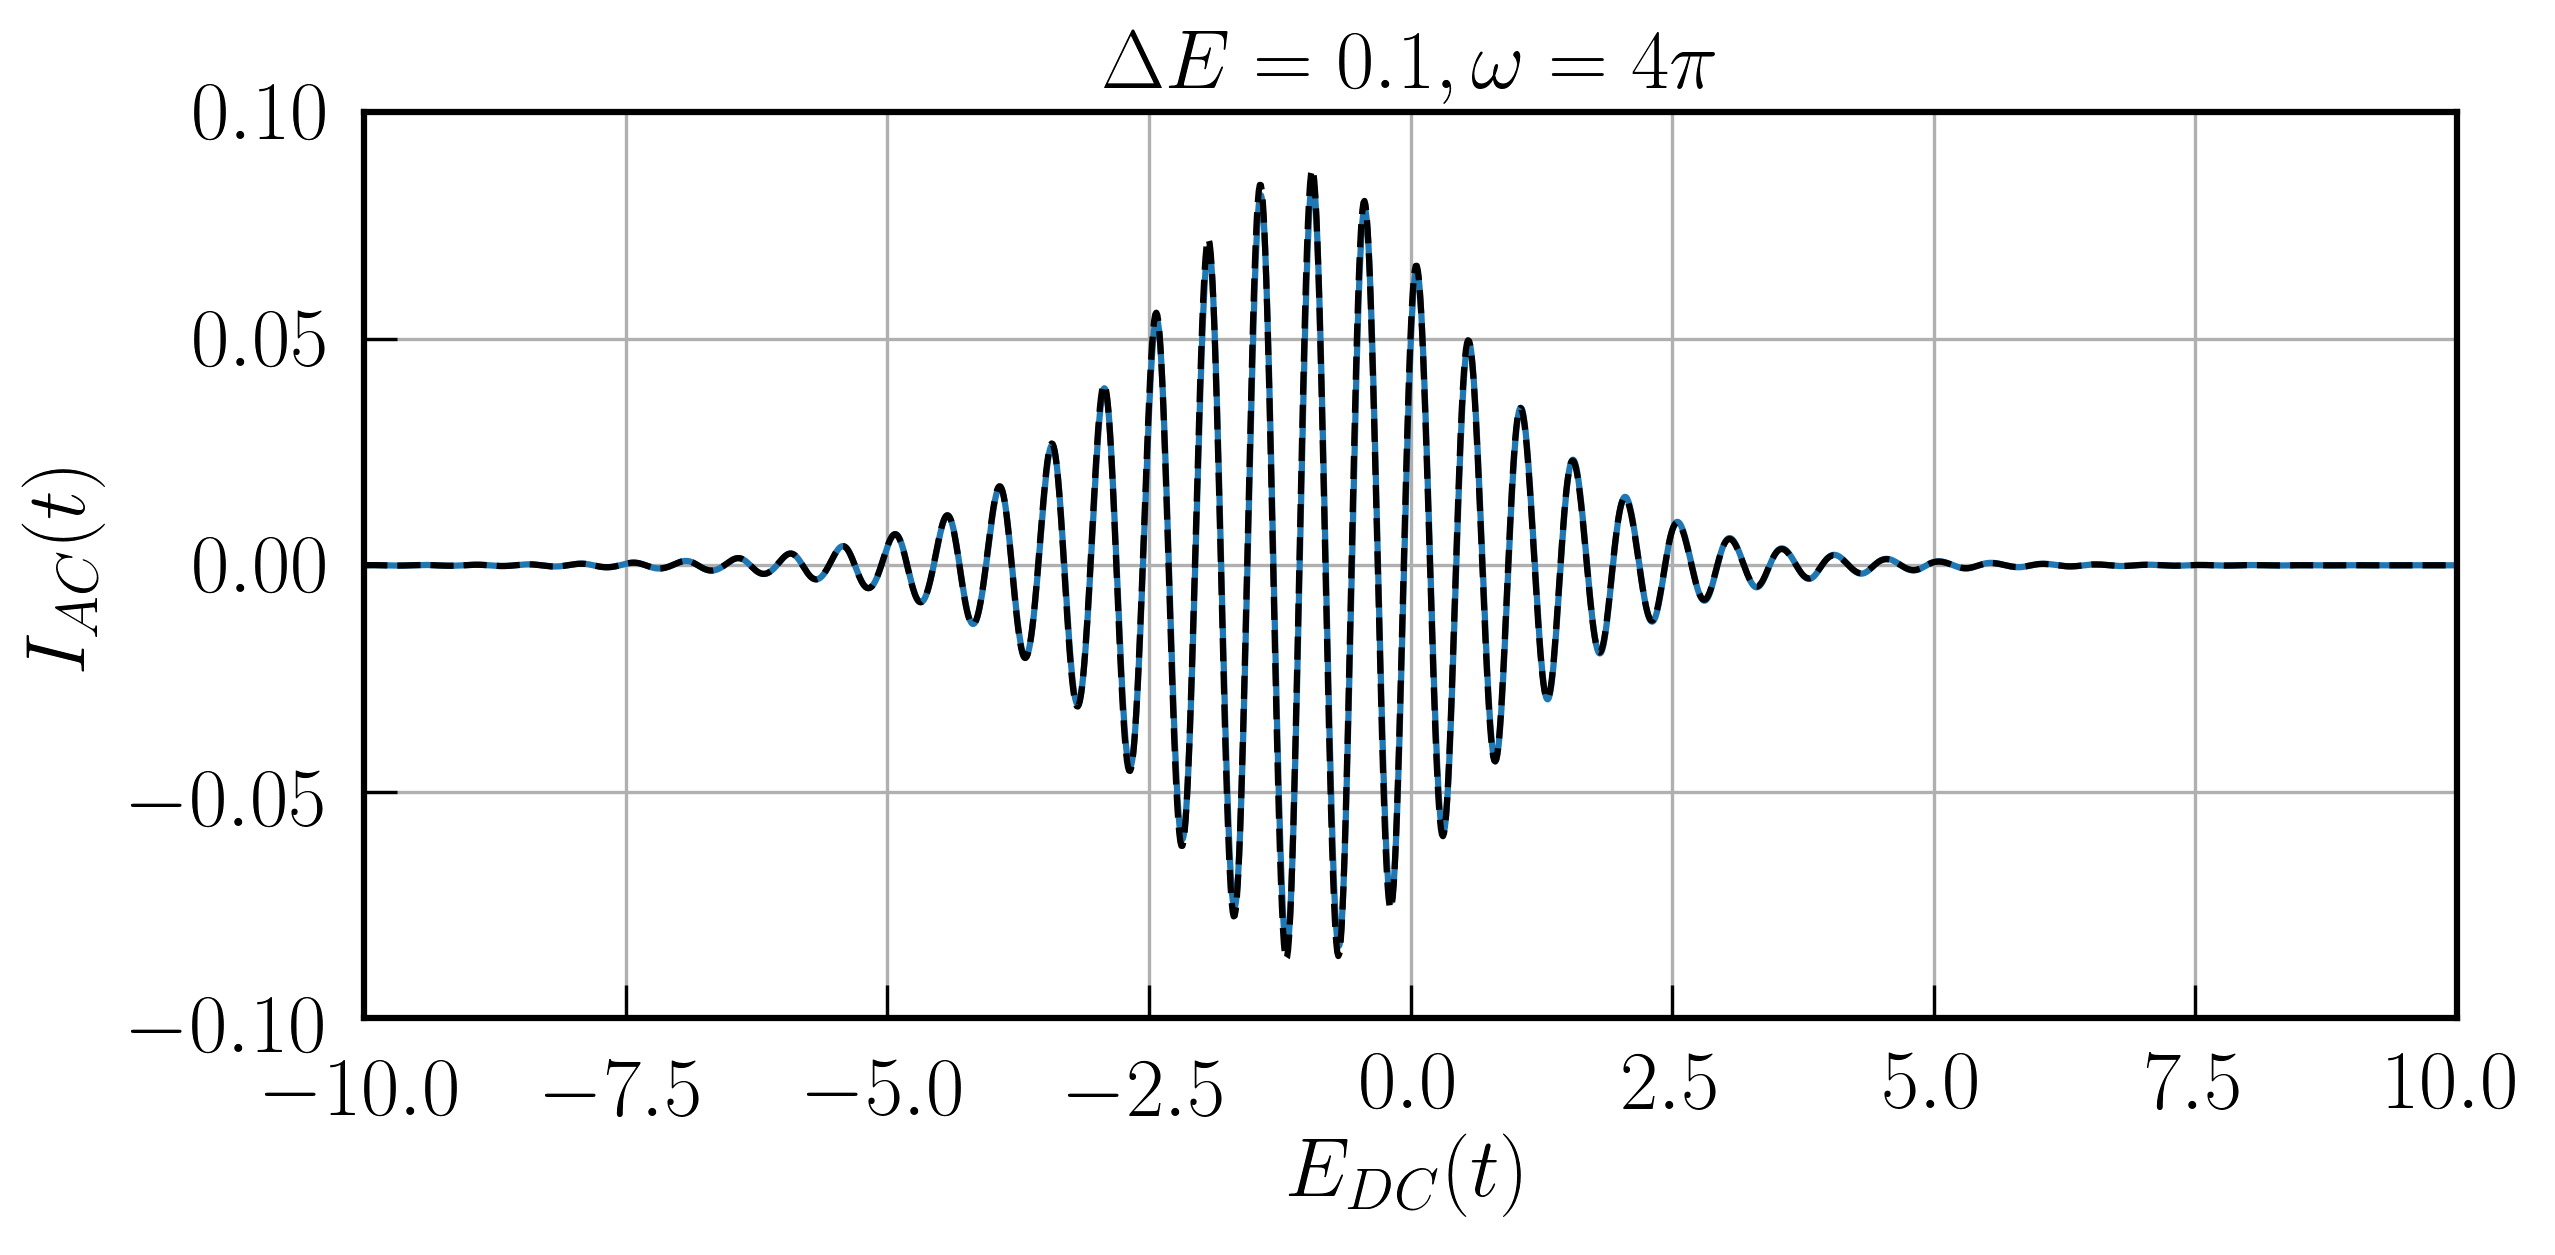

In [119]:
pl.plot(E_linear(t), I2 - Idc, label = r'$k_0 = 35$')
pl.plot(E_linear(t_integral), I_integral3 - I_integral2, 'k--', label = r'$k_0 = 35$')
pl.xlim(-10, 10)
pl.ylim(-0.1, 0.1)
pl.xlabel(r'$E_{DC}(t)$')
pl.ylabel(r'$I_{AC}(t)$')
pl.title(r'$\Delta E = 0.1, \omega = 4\pi$')
pl.grid()
pl.savefig('plot4.png', bbox_inches = 'tight')